In [1]:
import pandas as pd
from datetime import datetime, timedelta
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('Drowsy_Data.csv')
data.head()

,timestamp,ear,rolling_mean,rolling_std,drowsy
0,24:32.8,0.303,0.2532,0.013722,0
1,24:33.8,0.318,0.3900,0.016897,1
2,24:34.8,0.299,0.2422,0.019563,1
3,24:35.8,0.285,0.2411,0.017939,0
4,24:36.8,0.291,0.2992,0.012617,1


In [13]:
df = pd.DataFrame(data)

In [17]:
df.describe

<bound method NDFrame.describe of    timestamp    ear  rolling_mean  rolling_std  drowsy
0    24:32.8  0.303        0.2532     0.013722       0
1    24:33.8  0.318        0.3900     0.016897       1
2    24:34.8  0.299        0.2422     0.019563       1
3    24:35.8  0.285        0.2411     0.017939       0
4    24:36.8  0.291        0.2992     0.012617       1
5    24:37.8  0.312        0.3010     0.013874       0
6    24:38.8  0.328        0.3030     0.017248       0
7    24:39.8  0.315        0.3062     0.017796       0
8    24:40.8  0.327        0.3146     0.014977       1
9    24:41.8  0.340        0.3244     0.011238       1
10   24:42.8  0.297        0.3214     0.016257       0
11   24:43.8  0.303        0.3164     0.017516       1
12   24:44.8  0.284        0.3102     0.022819       0
13   24:45.8  0.313        0.3074     0.021031       1
14   24:46.8  0.322        0.3038     0.014618       1
15   24:47.8  0.290        0.3024     0.015726       0
16   24:48.8  0.301        0.30

In [19]:
df.info

<bound method DataFrame.info of    timestamp    ear  rolling_mean  rolling_std  drowsy
0    24:32.8  0.303        0.2532     0.013722       0
1    24:33.8  0.318        0.3900     0.016897       1
2    24:34.8  0.299        0.2422     0.019563       1
3    24:35.8  0.285        0.2411     0.017939       0
4    24:36.8  0.291        0.2992     0.012617       1
5    24:37.8  0.312        0.3010     0.013874       0
6    24:38.8  0.328        0.3030     0.017248       0
7    24:39.8  0.315        0.3062     0.017796       0
8    24:40.8  0.327        0.3146     0.014977       1
9    24:41.8  0.340        0.3244     0.011238       1
10   24:42.8  0.297        0.3214     0.016257       0
11   24:43.8  0.303        0.3164     0.017516       1
12   24:44.8  0.284        0.3102     0.022819       0
13   24:45.8  0.313        0.3074     0.021031       1
14   24:46.8  0.322        0.3038     0.014618       1
15   24:47.8  0.290        0.3024     0.015726       0
16   24:48.8  0.301        0.3020

In [23]:
df.isna().sum()

timestamp       0
ear             0
rolling_mean    0
rolling_std     0
drowsy          0
dtype: int64

In [25]:
df.columns

Index(['timestamp', 'ear', 'rolling_mean', 'rolling_std', 'drowsy'], dtype='object')

In [27]:
Numerical_columns = df.select_dtypes(include = ['int64','float64']).columns
Numerical_columns

Index(['ear', 'rolling_mean', 'rolling_std', 'drowsy'], dtype='object')

In [29]:
Categorical_columns = df.select_dtypes(include = ['object']).columns
Categorical_columns

Index(['timestamp'], dtype='object')

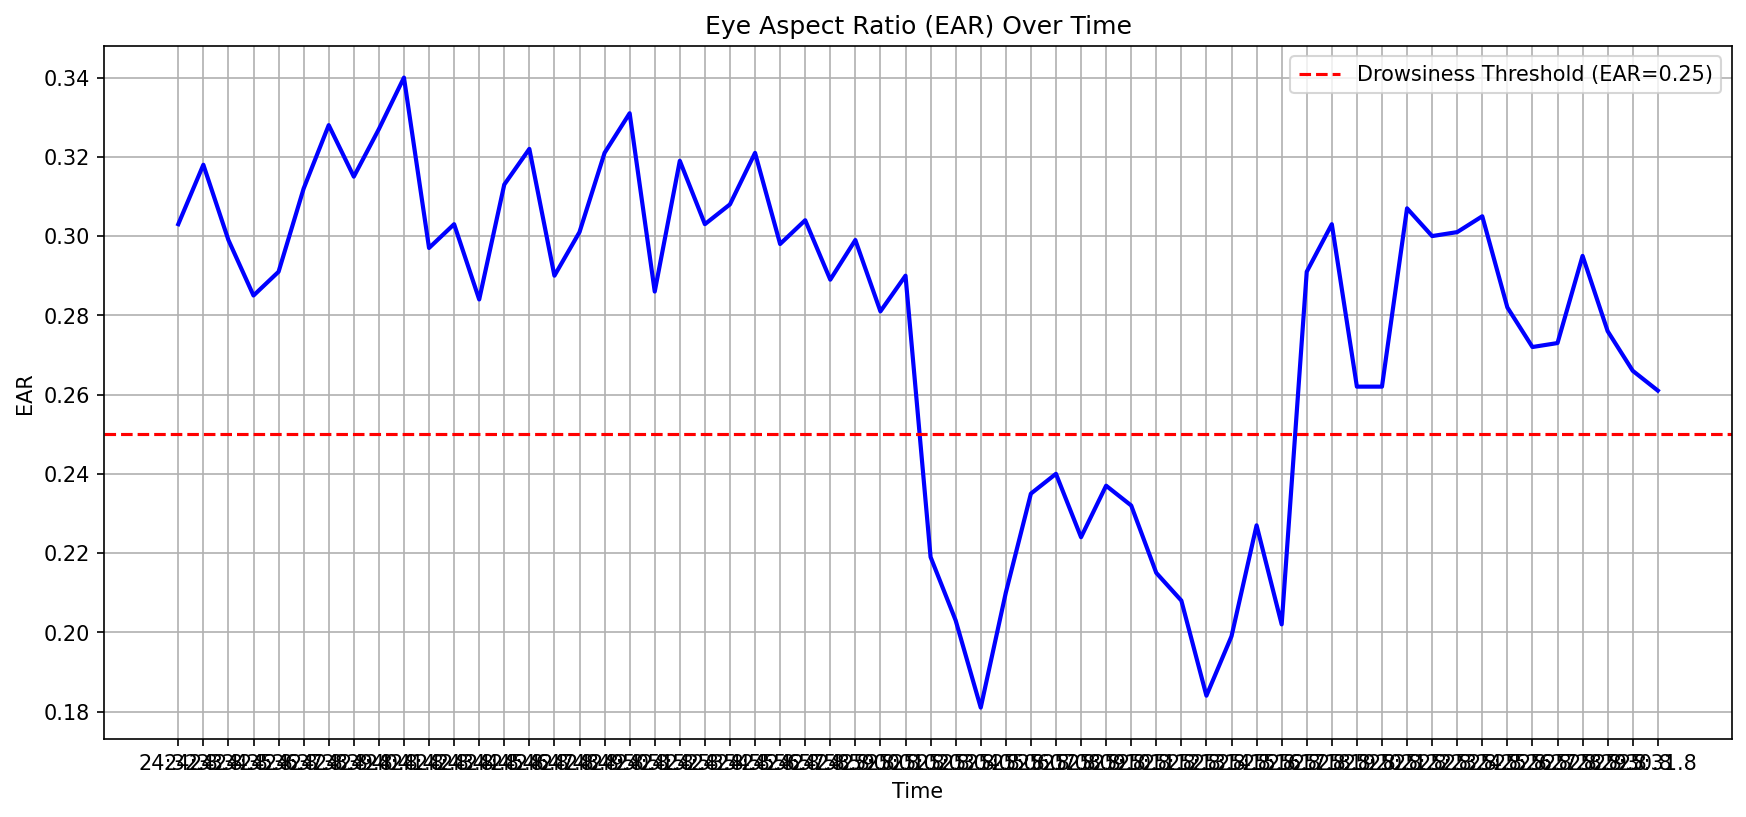

In [39]:
# EAR over Time Plot
plt.figure(figsize=(14, 6), dpi=150)
plt.plot(df['timestamp'], df['ear'], color='blue', linewidth=2)
plt.axhline(y=0.25, color='red', linestyle='--', label='Drowsiness Threshold (EAR=0.25)')
plt.title("Eye Aspect Ratio (EAR) Over Time")
plt.xlabel("Time")
plt.ylabel("EAR")
plt.legend()
plt.grid(True)
plt.show()

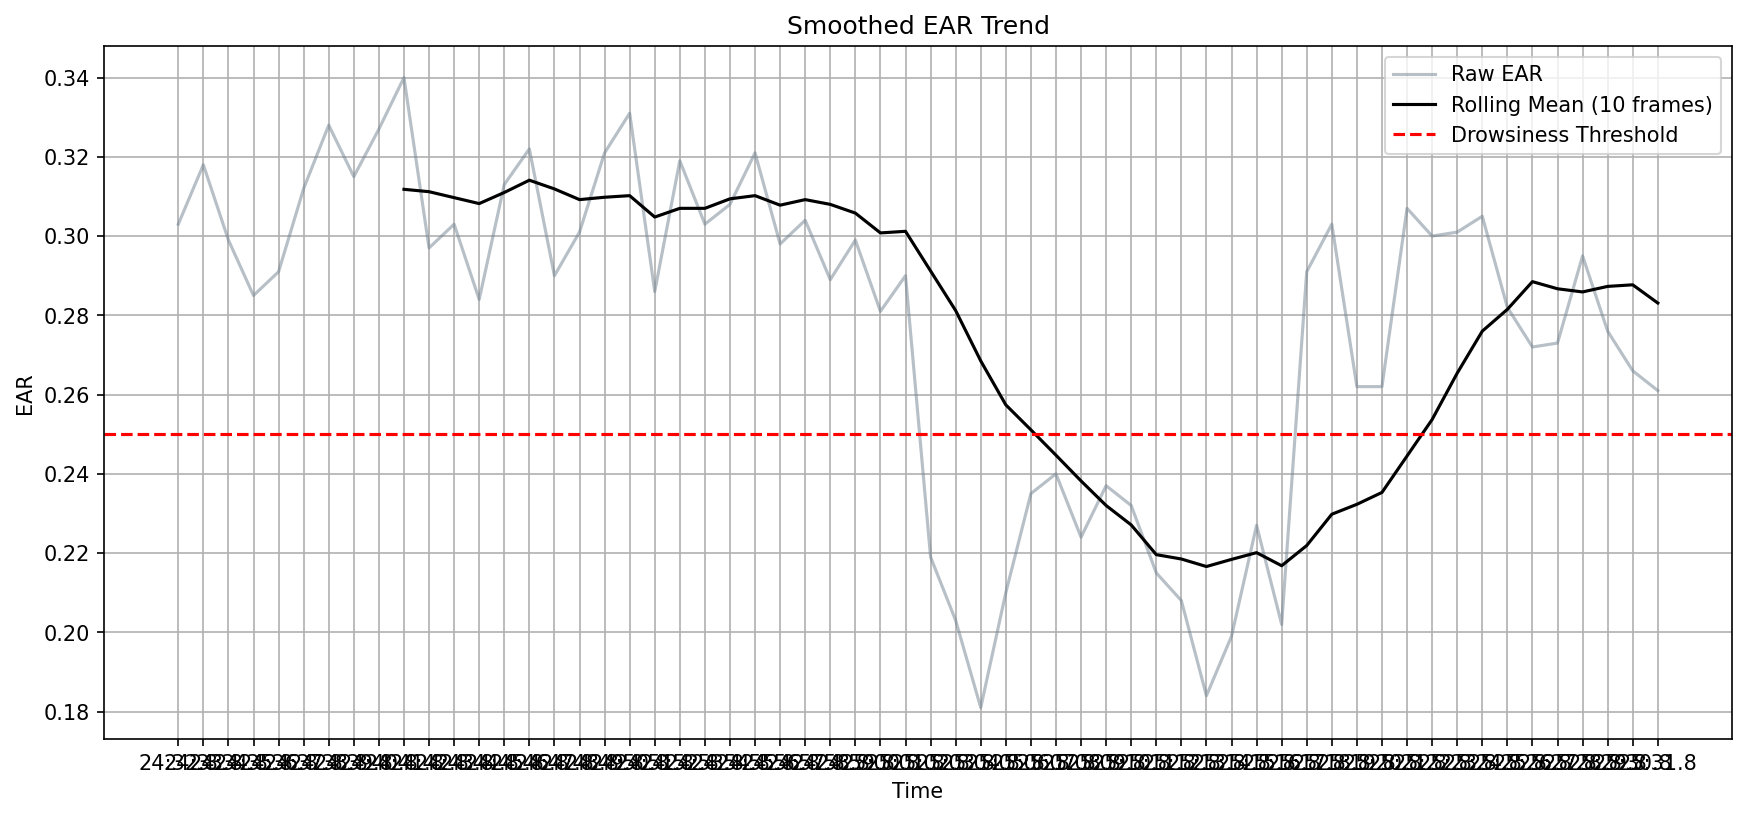

In [59]:
# Moving Average to Smooth EAR Trend
df['rolling_ear'] = df['ear'].rolling(window=10).mean()

plt.figure(figsize=(14, 6), dpi=150)
plt.plot(df['timestamp'], df['ear'], alpha=0.5, label='Raw EAR', color='slategray')
plt.plot(df['timestamp'], df['rolling_ear'], color='black', label='Rolling Mean (10 frames)')
plt.axhline(y=0.25, color='red', linestyle='--', label='Drowsiness Threshold')
plt.title("Smoothed EAR Trend")
plt.xlabel("Time")
plt.ylabel("EAR")
plt.legend()
plt.grid(True)
plt.show()

Total Drowsy Frames Detected: 15


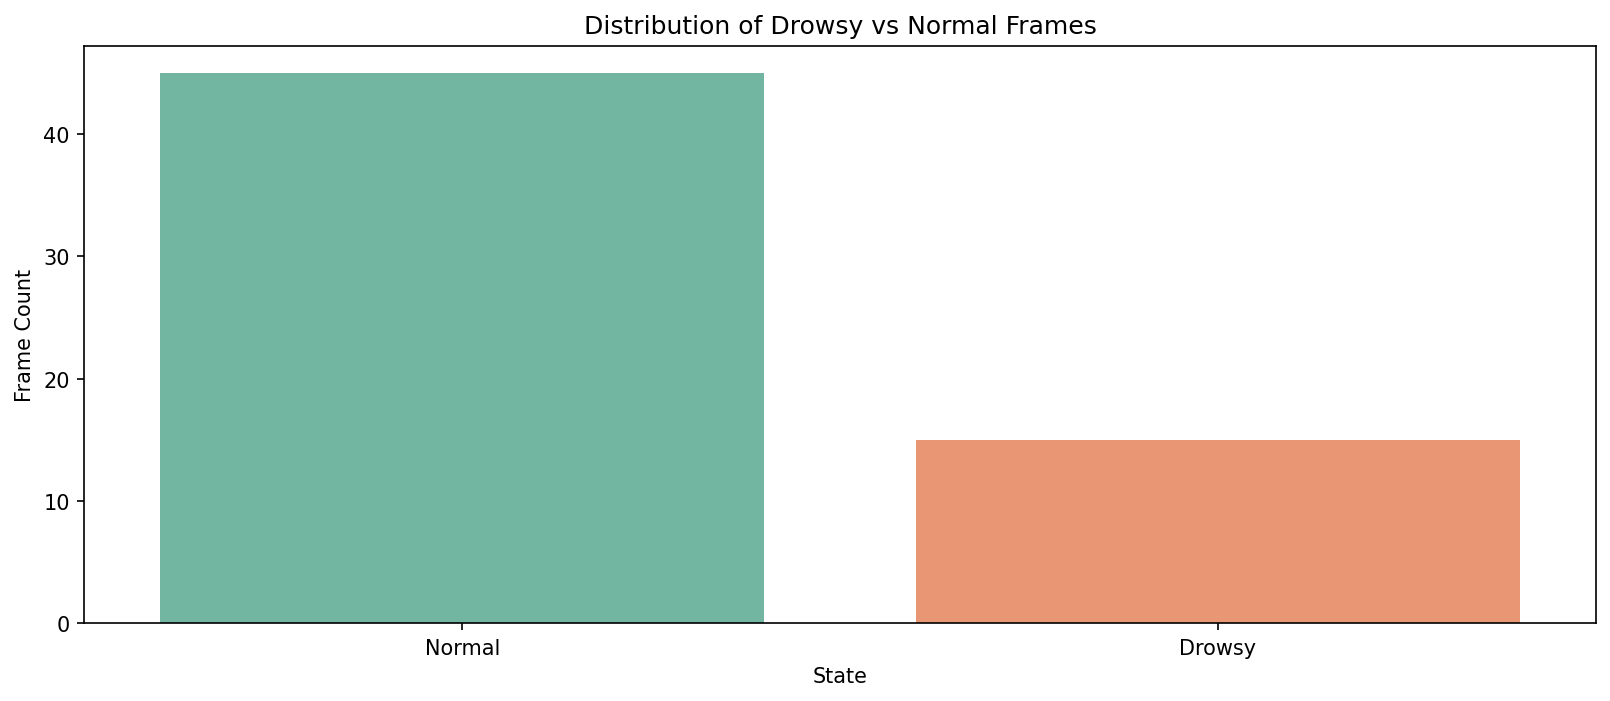

In [43]:
# Identify Drowsy Events (EAR below threshold)
df['drowsy'] = df['ear'] < 0.25

# Count total drowsy frames
drowsy_frames = df['drowsy'].sum()
print(f"Total Drowsy Frames Detected: {drowsy_frames}")

# Plot Drowsy vs Normal
plt.figure(figsize=(13,5), dpi=150)
sns.countplot(x=df['drowsy'].map({True: "Drowsy", False: "Normal"}), palette="Set2", hue=df['drowsy'], legend=False)
plt.title("Distribution of Drowsy vs Normal Frames")
plt.ylabel("Frame Count")
plt.xlabel("State")
plt.show()

In [61]:
df['rolling_ear'] = df['rolling_ear'].fillna(df['ear'])

In [124]:
df

,timestamp,ear,rolling_mean,rolling_std,drowsy,rolling_ear,state
0,24:32.8,0.303,0.2532,0.013722,False,0.3030,1
1,24:33.8,0.318,0.3900,0.016897,False,0.3180,1
2,24:34.8,0.299,0.2422,0.019563,False,0.2990,1
3,24:35.8,0.285,0.2411,0.017939,False,0.2850,1
4,24:36.8,0.291,0.2992,0.012617,False,0.2910,1
5,24:37.8,0.312,0.3010,0.013874,False,0.3120,1
6,24:38.8,0.328,0.3030,0.017248,False,0.3280,1
7,24:39.8,0.315,0.3062,0.017796,False,0.3150,1
8,24:40.8,0.327,0.3146,0.014977,False,0.3270,1
9,24:41.8,0.340,0.3244,0.011238,False,0.3118,1


## Feature & Target

In [66]:
X = df[['ear', 'rolling_mean', 'rolling_std']]
y = df['drowsy'].astype(int)  # Convert True/False to 1/0

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train

,ear,rolling_mean,rolling_std
31,0.203,0.2584,0.044100
3,0.285,0.2411,0.017939
52,0.305,0.2950,0.018668
17,0.321,0.3094,0.013722
8,0.327,0.3146,0.014977
6,0.328,0.3030,0.017248
40,0.208,0.2232,0.011904
4,0.291,0.2992,0.012617
43,0.227,0.2066,0.016257
19,0.286,0.3058,0.019563


In [72]:
X_test

,ear,rolling_mean,rolling_std
0,0.303,0.2532,0.013722
5,0.312,0.3010,0.013874
36,0.224,0.2180,0.023675
45,0.291,0.2206,0.042276
13,0.313,0.3074,0.021031
54,0.272,0.2920,0.014265
33,0.210,0.2206,0.041259
48,0.262,0.2640,0.039058
12,0.284,0.3102,0.022819
57,0.276,0.2796,0.009450


## Train Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [105]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)  # returns accuracy
print("Model Accuracy:", round(accuracy, 4))

Model Accuracy: 0.9167


In [132]:
y_pred = rf_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.9166666666666666
Precision: 0.6666666666666666
Recall   : 1.0
F1 Score : 0.8


In [107]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [109]:
accuracy = lr_model.score(X_test, y_test)  # returns accuracy
print("Model Accuracy:", round(accuracy, 4))

Model Accuracy: 0.8333


In [111]:
from sklearn.metrics import classification_report

print("Random Forest:\n", classification_report(y_test, rf_model.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, lr_model.predict(X_test)))

Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12

Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12



C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


| Model                       | Accuracy     |
| --------------------------- | ------------ |
| 🎯 Random Forest Classifier | **91.67%** ✅ |
| 📉 Logistic Regression      | 83.33%       |


### Random Forest outperforms Logistic Regression on dataset.

In [122]:
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12



In [120]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[9 1]
 [0 2]]


In [130]:
import joblib
joblib.dump(rf_model, "Drowsiness_model.pkl")
print("Model saved as Drowsiness_model.pkl")

Model saved as Drowsiness_model.pkl
